# You can download Data with use this code in Jupyter or Pycharm

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

100%|██████████| 22.0k/22.0k [00:00<00:00, 1.85MB/s]

Extracting files...
Path to dataset files: C:\Users\hp\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv('Downloads\Titanic-Dataset.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

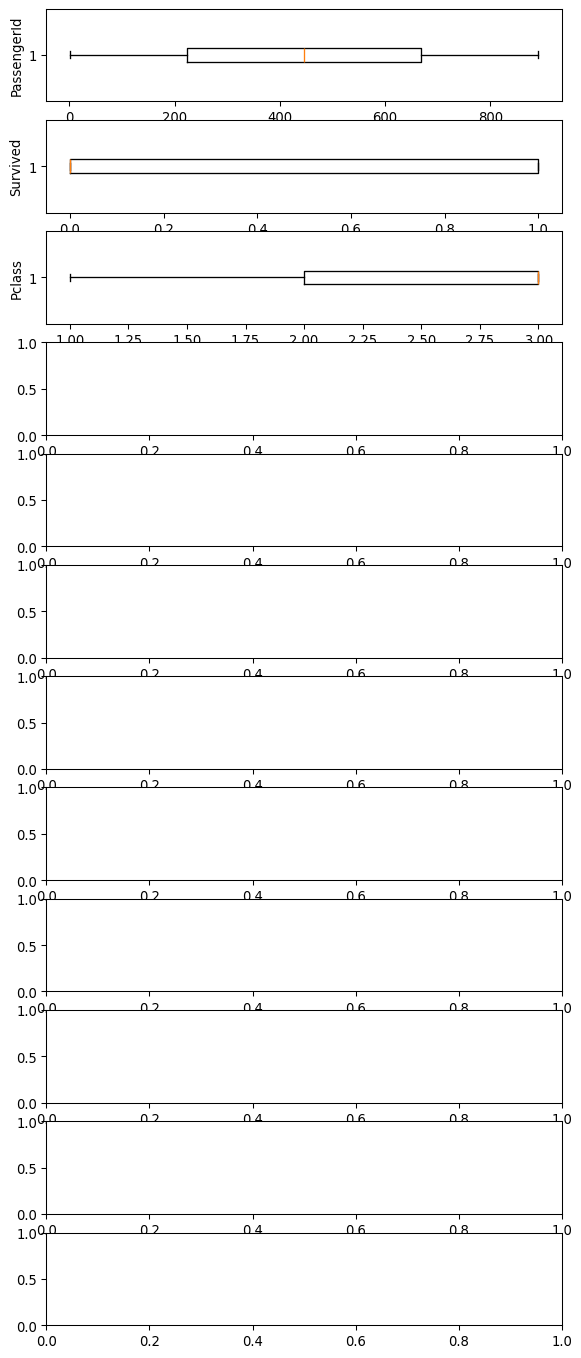

In [21]:
df.describe()

fig, axs = plt.subplots(len(df.columns), 1, figsize=(7, 18), dpi=95)
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

# Step 2: Check for Duplicate Rows

In [4]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

# Step 3: Identify Column Data Types

In [5]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# Step 4: Count Unique Values in the Categorical Columns
    df[numeric_columns].nunique(): Returns count of unique values per column.

In [6]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

# Step 5: Calculate Missing Values as Percentage

In [7]:
round((df.isnull().sum() / df.shape[0]) * 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

# Step 6: Drop Irrelevant or Data-Heavy Missing Columns

In [8]:
df1 = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df1.dropna(subset=['Embarked'], inplace=True)
df1['Age'].fillna(df1['Age'].mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_16212\56642916.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].mean(), inplace=True)


# Step 7: Detect Outliers with Box Plot

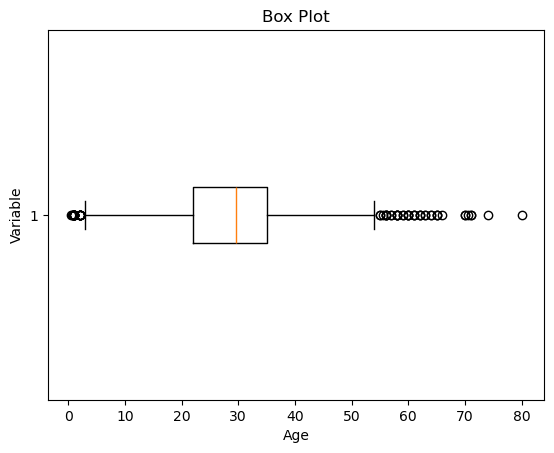

In [10]:
import matplotlib.pyplot as plt

plt.boxplot(df1['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

# Step 8: Calculate Outlier Boundaries and Remove Them

In [11]:
mean = df1['Age'].mean()
std = df1['Age'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

df2 = df1[(df1['Age'] >= lower_bound) & (df1['Age'] <= upper_bound)]

# Step 9: Impute Missing Data Again if Any

In [12]:
df3 = df2.fillna(df2['Age'].mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Step 10: Recalculate Outlier Bounds and Remove Outliers from the Updated Data

In [13]:
mean = df3['Age'].mean()
std = df3['Age'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)

df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]

Lower Bound : 8.978989004171481
Upper Bound : 49.30395961288911


### Step 11: Data validation and verification

In [14]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

### Step 12: Data formatting
##### min max 

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_16212\1761829158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.349515,0.125,0.0,0.014151,S
1,0.0,female,0.660194,0.125,0.0,0.139136,C
2,1.0,female,0.427184,0.000,0.0,0.015469,S
3,0.0,female,0.601942,0.125,0.0,0.103644,S
4,1.0,male,0.601942,0.000,0.0,0.015713,S


## Step 1: Import Libraries and Load Dataset

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('Downloads\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Step 2: Inspect Data Structure and Check Missing Values

In [23]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0


### Step 3: Statistical Summary and Visualizing Outliers

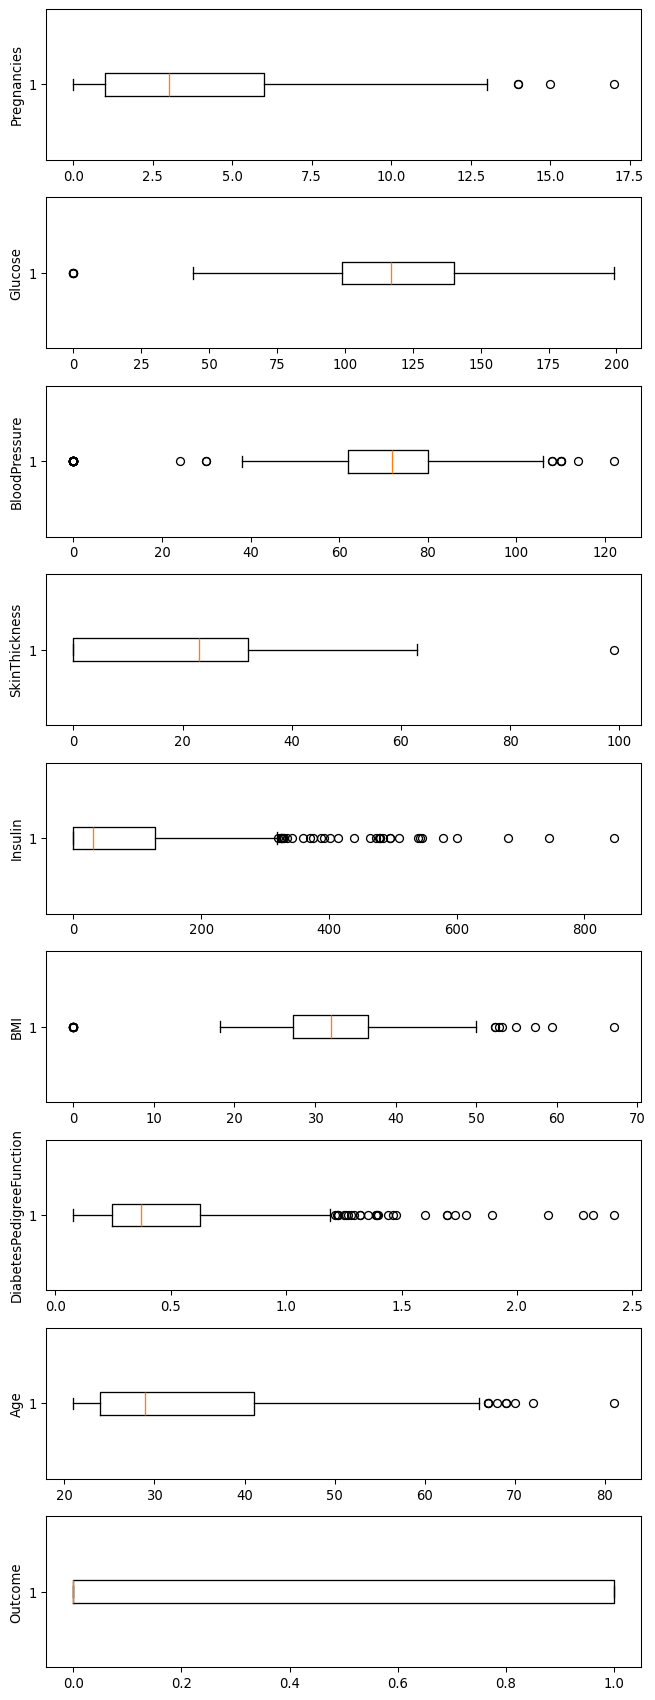

In [24]:
df.describe()

fig, axs = plt.subplots(len(df.columns), 1, figsize=(7, 18), dpi=95)
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

### Step 4: Remove Outliers Using the Interquartile Range (IQR) Method

In [25]:
q1, q3 = np.percentile(df['Insulin'], [25, 75])
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
clean_df = df[(df['Insulin'] >= lower) & (df['Insulin'] <= upper)]

### Step 5: Correlation Analysis

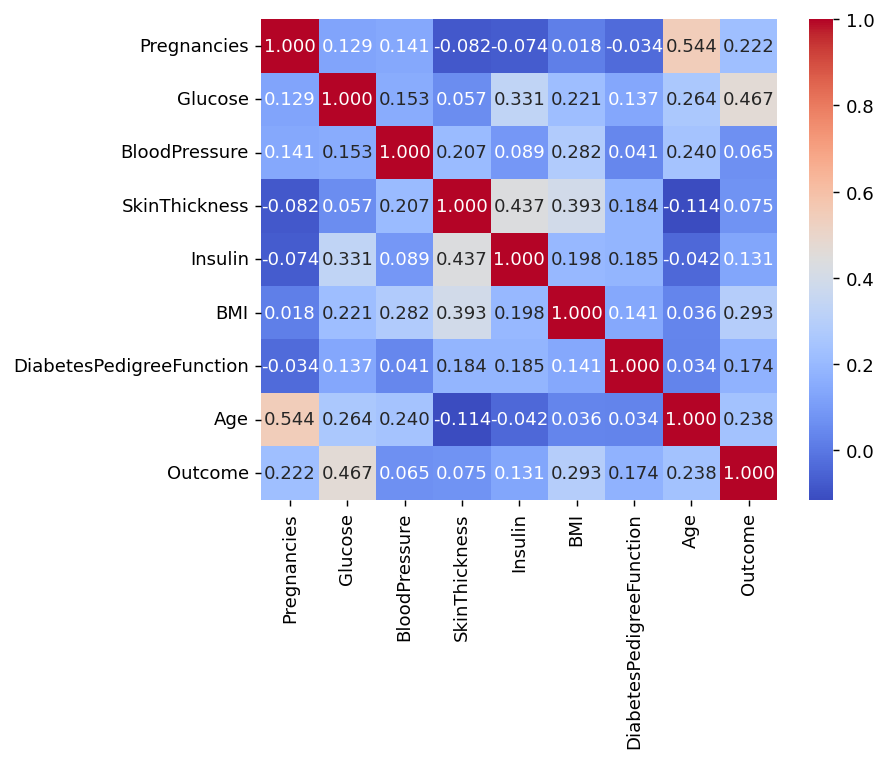

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [30]:
corr = df.corr()
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.3f', cmap='coolwarm') # If you want to change FMT and CMAP
plt.show()

print(corr['Outcome'].sort_values(ascending=False))

### Step 6: Visualize Target Variable Distribution

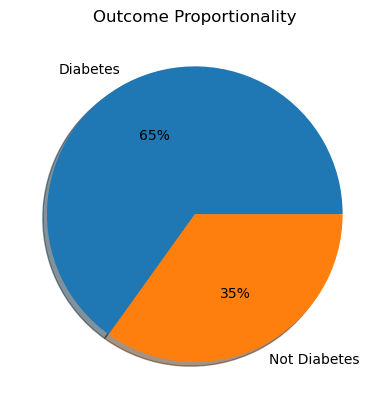

In [38]:
plt.pie(df['Outcome'].value_counts(), labels=[
        'Diabetes', 'Not Diabetes'], autopct='%.f%%', shadow=True)
plt.title('Outcome Proportionality')
plt.show()

### Step 7: Separate Features and Target Variable

In [39]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

### Step 8: Feature Scaling: Normalization and Standardization
##### StandardScaler from sklearn
##### MinMaxScaler from sklearn

In [40]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized[:5])

[[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


In [41]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print(X_standardized[:5])

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


In [42]:
max_abs = np.max(np.abs(df), axis=0)

scaled_df = df / max_abs

scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407,1.0


##### see in Step 8

In [43]:
# from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


### Normalization (Vector Normalization)
###### import Normalizer

In [45]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.033552,0.827612,0.402622,0.195719,0.000000,0.187890,0.003506,0.279599,0.005592
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144,0.000000
2,0.040397,0.924085,0.323177,0.000000,0.000000,0.117657,0.003393,0.161589,0.005050
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0.000000
4,0.000000,0.596381,0.174126,0.152360,0.731328,0.187620,0.009960,0.143654,0.004353


### Standardization
##### import StandardScaler

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
print(scaled_df.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.468492  1.425995  1.365896  
1                 -0.365061 -0.190672 -0.732120  
2                  0.604397 -0.105584  1.365896  
3                 -0.920763 -1.041549 -0.732120  
4                  5.484909 -0.020496  1.365896  


### Robust Scaling
##### RobustScaler

In [47]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
print(scaled_df.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.6  0.751515       0.000000        0.37500 -0.239686  0.172043   
1         -0.4 -0.775758      -0.333333        0.18750 -0.239686 -0.580645   
2          1.0  1.600000      -0.444444       -0.71875 -0.239686 -0.935484   
3         -0.4 -0.678788      -0.333333        0.00000  0.499018 -0.419355   
4         -0.6  0.484848      -1.777778        0.37500  1.080550  1.193548   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.665359  1.235294      1.0  
1                 -0.056209  0.117647      0.0  
2                  0.783007  0.176471      1.0  
3                 -0.537255 -0.470588      0.0  
4                  5.007843  0.235294      1.0  


### Common Techniques in Feature Engineering
##### 1. One-Hot Encoding:

In [48]:
import pandas as pd

data = {'Color': ['Red', 'Blue', 'Green', 'Blue']}
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['Color'], prefix='Color')

print(df_encoded)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False
3        True        False      False


### 2. Binning

In [49]:
import pandas as pd

data = {'Age': [23, 45, 18, 34, 67, 50, 21]}
df = pd.DataFrame(data)

bins = [0, 20, 40, 60, 100]
labels = ['0-20', '21-40', '41-60', '61+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print(df)

   Age Age_Group
0   23     21-40
1   45     41-60
2   18      0-20
3   34     21-40
4   67       61+
5   50     41-60
6   21     21-40


### 3. Text Data Preprocessing

In [50]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

texts = ["This is a sample sentence.", "Text data preprocessing is important."]

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
vectorizer = CountVectorizer()


def preprocess_text(text):
    words = text.split()
    words = [stemmer.stem(word)
             for word in words if word.lower() not in stop_words]
    return " ".join(words)


cleaned_texts = [preprocess_text(text) for text in texts]

X = vectorizer.fit_transform(cleaned_texts)

print("Cleaned Texts:", cleaned_texts)
print("Vectorized Text:", X.toarray())

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\hp/nltk_data'
    - 'C:\\Users\\hp\\anaconda3\\nltk_data'
    - 'C:\\Users\\hp\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\hp\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\hp\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [51]:
import pandas as pd

data = {'Full_Address': [
    '123 Elm St, Springfield, 12345', '456 Oak Rd, Shelbyville, 67890']}
df = pd.DataFrame(data)

df[['Street', 'City', 'Zipcode']] = df['Full_Address'].str.extract(
    r'([0-9]+\s[\w\s]+),\s([\w\s]+),\s(\d+)')

print(df)

                     Full_Address      Street         City Zipcode
0  123 Elm St, Springfield, 12345  123 Elm St  Springfield   12345
1  456 Oak Rd, Shelbyville, 67890  456 Oak Rd  Shelbyville   67890


### **Exploratory Data Analysis (EDA)**
--------------------------------
is an important step in data science and data analytics as it visualizes data to understand its main features, find patterns and discover how different parts of the data are connected.

### file.webpfile.webp
--------------------
Why Exploratory Data Analysis Important
Helps to understand the dataset by showing how many features it has, what type of data each feature contains and how the data is distributed.
Helps to identify hidden patterns and relationships between different data points which help us in and model building.
Allows to identify errors or unusual data points (outliers) that could affect our results.
The insights gained from EDA help us to identify most important features for building models and guide us on how to prepare them for better performance.
By understanding the data it helps us in choosing best modeling techniques and adjusting them for better results.
Types of Exploratory Data Analysis
There are various types of EDA based on nature of records. Depending on the number of columns we are analyzing we can divide EDA into three types:

***1. Univariate Analysis***
Univariate analysis focuses on studying one variable to understand its characteristics. It helps to describe data and find patterns within a single feature. Various common methods like histograms are used to show data distribution, box plots to detect outliers and understand data spread and bar charts for categorical data. Summary statistics like mean, median, mode, variance and standard deviation helps in describing the central tendency and spread of the data

***2. Bivariate Analysis***
Bivariate Analysis focuses on identifying relationship between two variables to find connections, correlations and dependencies. It helps to understand how two variables interact with each other. Some key techniques include:

Scatter plots which visualize the relationship between two continuous variables.
Correlation coefficient measures how strongly two variables are related which commonly use Pearson's correlation for linear relationships.
Cross-tabulation or contingency tables shows the frequency distribution of two categorical variables and help to understand their relationship.
Line graphs are useful for comparing two variables over time in time series data to identify trends or patterns.
Covariance measures how two variables change together but it is paired with the correlation coefficient for a clearer and more standardized understanding of the relationship.

***3. Multivariate Analysis***
Multivariate Analysis identify relationships between two or more variables in the dataset and aims to understand how variables interact with one another which is important for statistical modeling techniques. It include techniques like:

Pair plots which shows the relationships between multiple variables at once and helps in understanding how they interact.
Another technique is Principal Component Analysis (PCA) which reduces the complexity of large datasets by simplifying them while keeping the most important information.
Spatial Analysis is used for geographical data by using maps and spatial plotting to understand the geographical distribution of variables.
Time Series Analysis is used for datasets that involve time-based data and it involves understanding and modeling patterns and trends over time. Common techniques include line plots, autocorrelation analysis, moving averages and ARIMA models.
Steps for Performing Exploratory Data Analysis
It involves a series of steps to help us understand the data, uncover patterns, identify anomalies, test hypotheses and ensure the data is clean and ready for further analysis. It can be done using different tools like:

In Python, Pandas is used to clean, filter and manipulate data. Matplotlib helps to create basic visualizations while Seaborn makes more attractive plots. For interactive visualizations Plotly is a good choice.
In R, ggplot2 is used for creating complex plots, dplyr helps with data manipulation and tidyr makes sure our data is organized and easy to work with.
Its step includes:

### Step 1: Understanding the Problem and the Data
----------------------------------------------------
The first step in any data analysis project is to fully understand the problem we're solving and the data we have. This includes asking key questions like:

What is the business goal or research question?
What are the variables in the data and what do they represent?
What types of data (numerical, categorical, text, etc.) do you have?
Are there any known data quality issues or limitations?
Are there any domain-specific concerns or restrictions?
By understanding the problem and the data, we can plan our analysis more effectively, avoid incorrect assumptions and ensure accurate conclusions.

### Step 2: Importing and Inspecting the Data
-----------------------------------------------
After understanding the problem and the data, next step is to import the data into our analysis environment such as Python, R or a spreadsheet tool. It’s important to find data to gain an basic understanding of its structure, variable types and any potential issues. Here’s what we can do:

Load the data into our environment carefully to avoid errors or truncations.
Check the size of the data like number of rows and columns to understand its complexity.
Check for missing values and see how they are distributed across variables since missing data can impact the quality of your analysis.
Identify data types for each variable like numerical, categorical, etc which will help in the next steps of data manipulation and analysis.
Look for errors or inconsistencies such as invalid values, mismatched units or outliers which could show major issues with the data.
By completing these tasks we'll be prepared to clean and analyze the data more effectively.

### Step 3: Handling Missing Data
-------------------------------
Missing data is common in many datasets and can affect the quality of our analysis. During EDA it's important to identify and handle missing data properly to avoid biased or misleading results. Here’s how to handle it:

Understand the patterns and possible causes of missing data. Is it missing completely at random (MCAR), missing at random (MAR) or missing not at random (MNAR). Identifying this helps us to find best way to handle the missing data.
Decide whether to remove missing data or impute (fill in) the missing values. Removing data can lead to biased outcomes if the missing data isn’t MCAR. Filling values helps to preserve data but should be done carefully.
Use appropriate imputation methods like mean or median imputation, regression imputation or machine learning techniques like KNN or decision trees based on the data’s characteristics.
Consider the impact of missing data. Even after imputing, missing data can cause uncertainty and bias so understands the result with caution.
Properly handling of missing data improves the accuracy of our analysis and prevents misleading conclusions.

### Step 4: Exploring Data Characteristics
--------------------------------------
After addressing missing data we find the characteristics of our data by checking the distribution, central tendency and variability of our variables and identifying outliers or anomalies. This helps in selecting appropriate analysis methods and finding major data issues. We should calculate summary statistics like mean, median, mode, standard deviation, skewness and kurtosis for numerical variables. These provide an overview of the data’s distribution and helps us to identify any irregular patterns or issues.

### Step 5: Performing Data Transformation
-----------------------------------------
Data transformation is an important step in EDA as it prepares our data for accurate analysis and modeling. Depending on our data's characteristics and analysis needs, we may need to transform it to ensure it's in the right format. Common transformation techniques include:

Scaling or normalizing numerical variables like min-max scaling or standardization.
Encoding categorical variables for machine learning like one-hot encoding or label encoding.
Applying mathematical transformations like logarithmic square root to correct skewness or non-linearity.
Creating new variables from existing ones like calculating ratios or combining variables.
Aggregating or grouping data based on specific variables or conditions.

### Step 6: Visualizing Relationship of Data
----------------------------------------
Visualization helps to find relationships between variables and identify patterns or trends that may not be seen from summary statistics alone.

For categorical variables, create frequency tables, bar plots and pie charts to understand the distribution of categories and identify imbalances or unusual patterns.
For numerical variables generate histograms, box plots, violin plots and density plots to visualize distribution, shape, spread and potential outliers.
To find relationships between variables use scatter plots, correlation matrices or statistical tests like Pearson’s correlation coefficient or Spearman’s rank correlation.

### Step 7: Handling Outliers
------------------------
Outliers are data points that differs from the rest of the data may caused by errors in measurement or data entry. Detecting and handling outliers is important because they can skew our analysis and affect model performance. We can identify outliers using methods like interquartile range (IQR), Z-scores or domain-specific rules. Once identified it can be removed or adjusted depending on the context. Properly managing outliers shows our analysis is accurate and reliable.

### Step 8: Communicate Findings and Insights
------------------------------------------
The final step in EDA is to communicate our findings clearly. This involves summarizing the analysis, pointing out key discoveries and presenting our results in a clear way.

Clearly state the goals and scope of your analysis.
Provide context and background to help others understand your approach.
Use visualizations to support our findings and make them easier to understand.
Highlight key insights, patterns or anomalies discovered.
Mention any limitations or challenges faced during the analysis.
Suggest next steps or areas that need further investigation.

#### Exploratory Data Analysis (EDA)
##### Importing Required Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

####  Reading Dataset

In [53]:
df = pd.read_csv("Downloads\diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#### Analyzing the Data

In [58]:
df.shape

(768, 9)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
df.describe().T ## T= (Transpose)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [62]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

#### Checking Missing Values

In [63]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Checking for the duplicate values

In [64]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

#### Univariate Analysis
##### You can change xlabel and ylabel and quality_count

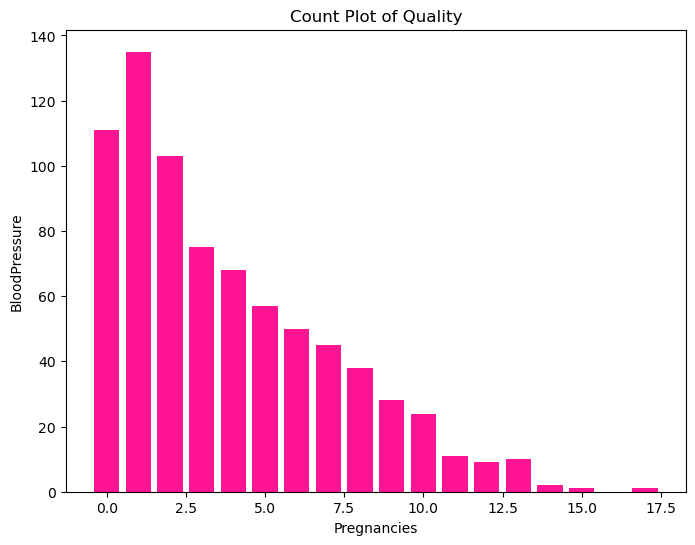

In [68]:
quality_counts = df['Pregnancies'].value_counts() 

plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='deeppink')
plt.title('Count Plot of Quality')
plt.xlabel('Pregnancies')
plt.ylabel('BloodPressure')
plt.show()

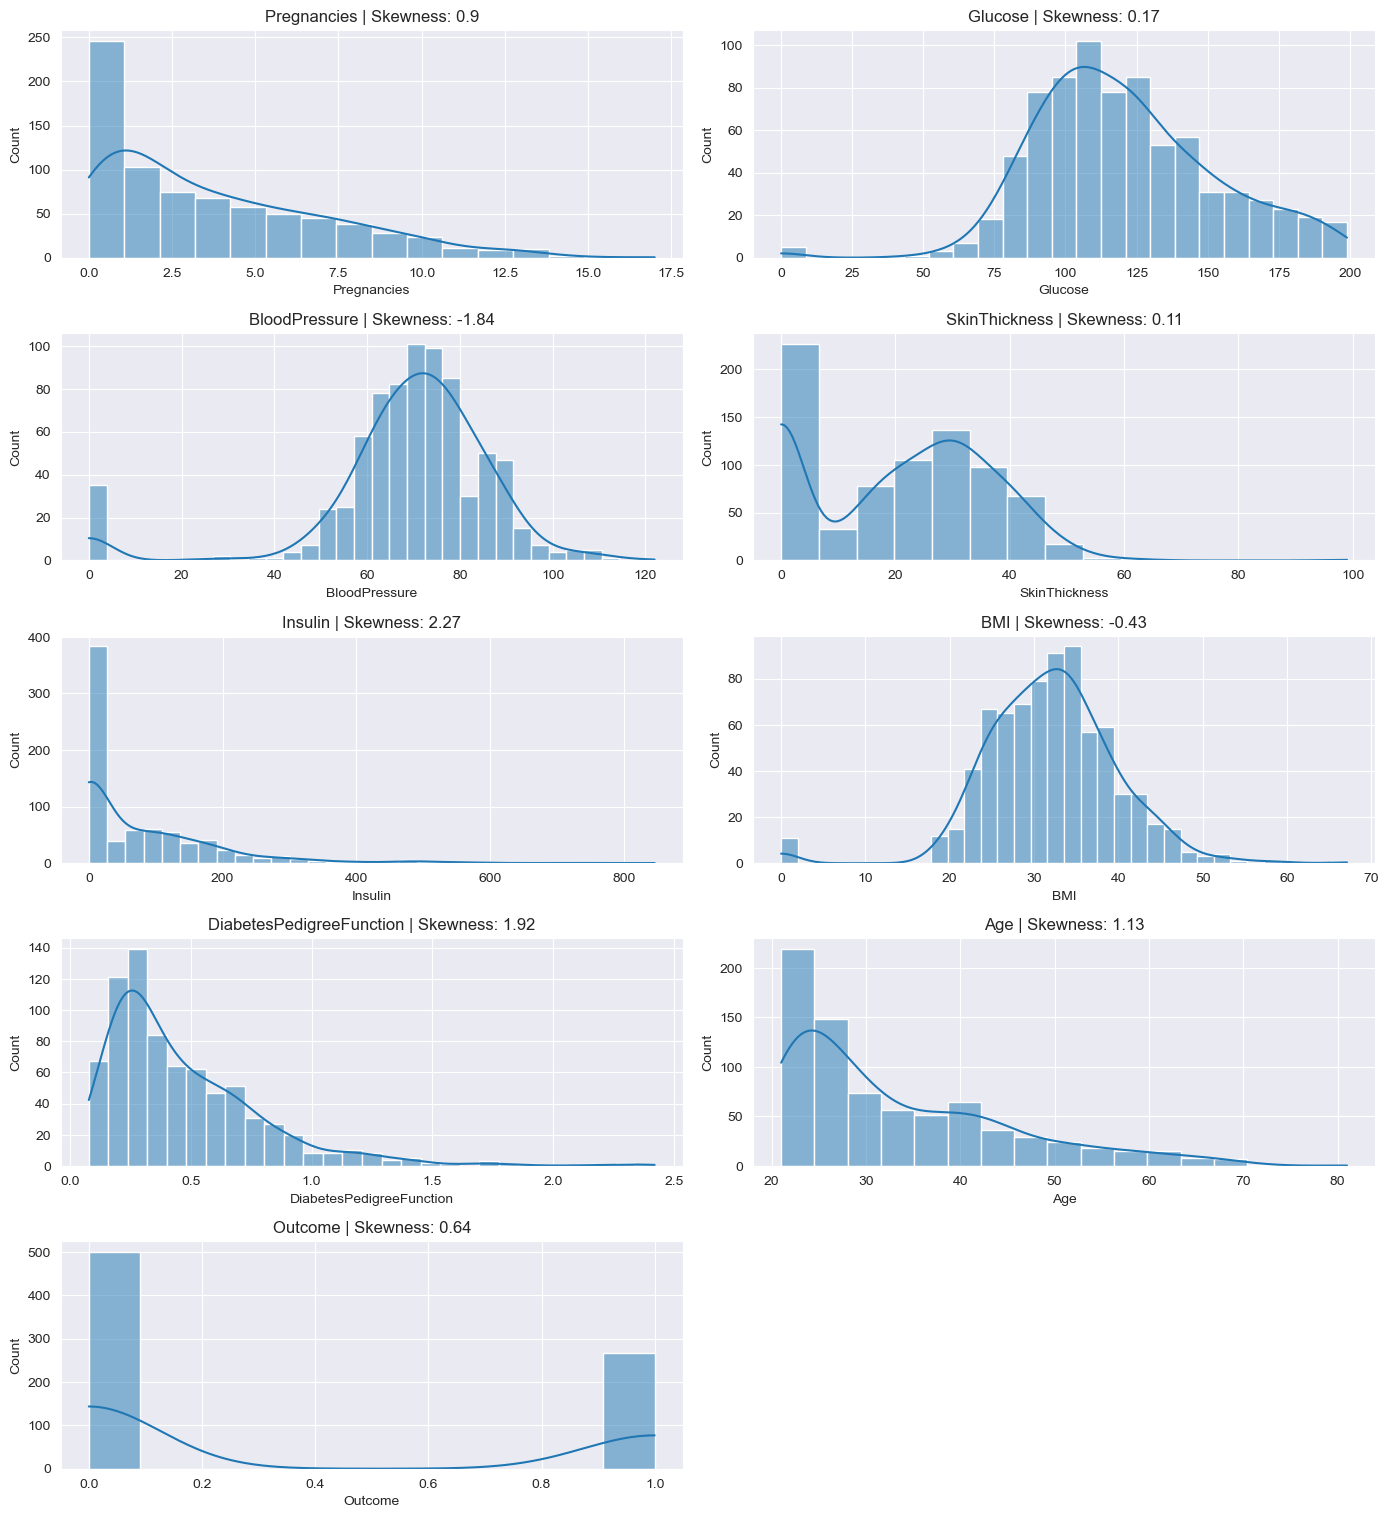

In [69]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()